# Plot Sky From Cadence of LSST
======================================

- author : Sylvie Dagoret-Campagne
- date : March 13th 2018

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
from astropy.time import Time

In [27]:
import sqlite3

In [28]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [29]:
conn = sqlite3.connect('./minion_1016_sqlite.db')

In [30]:
cursor=conn.cursor()

In [31]:
cursor=conn.execute("SELECT fieldID,fieldRA,fieldDEC from Field")

In [32]:
all_id = []
all_ra = []
all_dec = []

for row in cursor:
    ids = row[0]
    ra=row[1]
    dec=row[2]
    all_id.append(ids)
    all_ra.append(ra)
    all_dec.append(dec)

all_id=np.array(all_id)
all_ra=np.array(all_ra)
all_dec=np.array(all_dec)

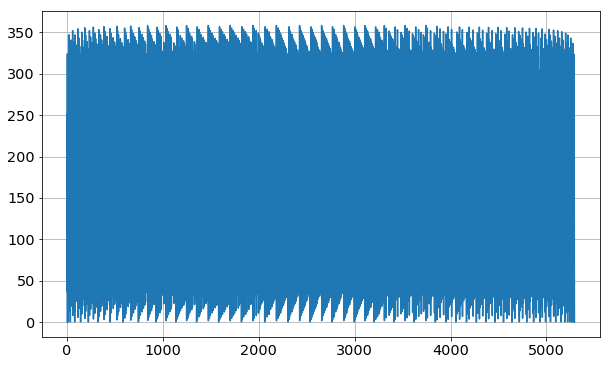

In [33]:
plt.plot(all_id,all_ra)
plt.grid()

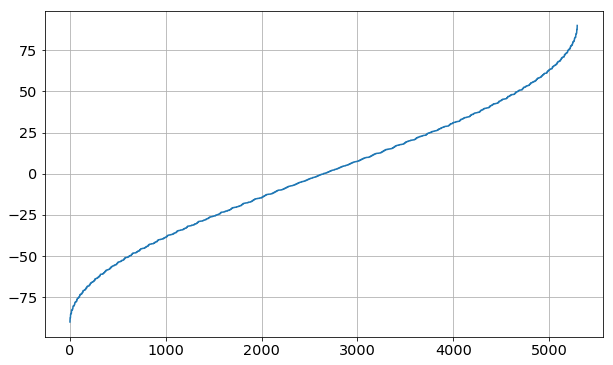

In [34]:
plt.plot(all_id,all_dec)
plt.grid()


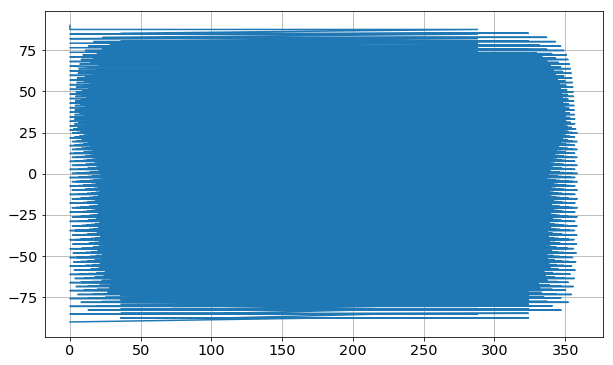

In [35]:
plt.plot(all_ra,all_dec)
plt.grid()


In [61]:
sel_field=1000

In [62]:
index=np.where(all_id==sel_field)[0][0]

In [63]:
index

999

In [64]:
sel_ra=all_ra[index]

In [65]:
sel_dec=all_dec[index]

In [66]:
print sel_ra,sel_dec

327.620330811 -38.6540641785


In [75]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from regions import PixCoord, CircleSkyRegion, CirclePixelRegion, RectangleSkyRegion, RectanglePixelRegion

In [69]:
new_ra = coord.Angle(sel_ra, unit=u.degree) # create an Angle object
new_ra.degree # convert to degrees
new_ra = new_ra.wrap_at(180*u.degree)

new_dec = coord.Angle(sel_dec*u.degree)

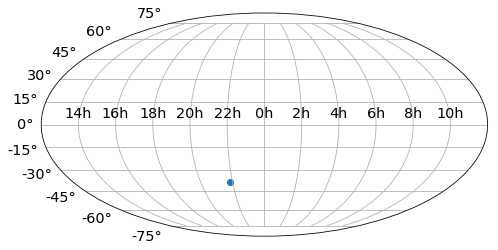

In [74]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(new_ra.radian, new_dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [84]:
rectangle_sky = RectangleSkyRegion(center=SkyCoord(new_ra.degree, new_dec.degree, unit='deg'),
...                                    width=Angle(3.5, 'deg'), height=Angle(3.5, 'deg'),
...                                    angle=Angle(4, 'deg'))
rectangle_pix = RectanglePixelRegion(center=PixCoord(x=new_ra.degree, y=new_dec.degree),
...                                    width=3.5, height=3.5,
...                                    angle=Angle(4, 'deg'))

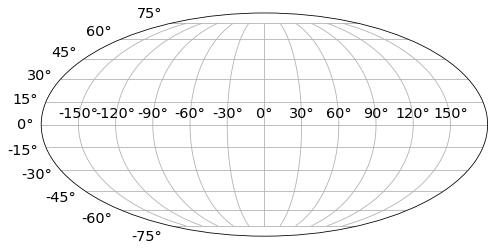

In [85]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
patch=rectangle_pix.as_patch()
ax.add_patch(patch)
ax = plt.gca()
#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
plt.show()